**Bangalore house price Dataset**

Import the Dependencies

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__load the dataset__

In [110]:
df=pd.read_csv(r"E:\Resume Machine Learning Projects\Bangalore House Prices\notebook\Bengaluru_House_Data.csv")

__Data Checks to Perform__

1.check null values


2.check duplicated


3.check dtypes


4.check nunique values


5.check describe

6.check various categroies present in datset

In [111]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [112]:
df.shape

(13320, 9)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [114]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

There are some null values in the datset

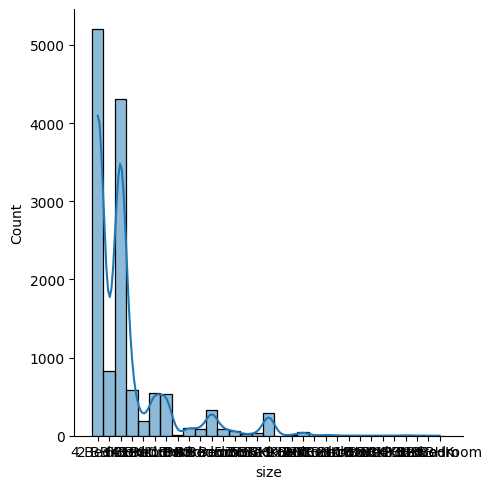

In [115]:

sns.displot(df["size"],kde=True)
plt.show()

In size col there are some outliers in data so i have to fill the median values

So i use mode categories to fill the values in size col

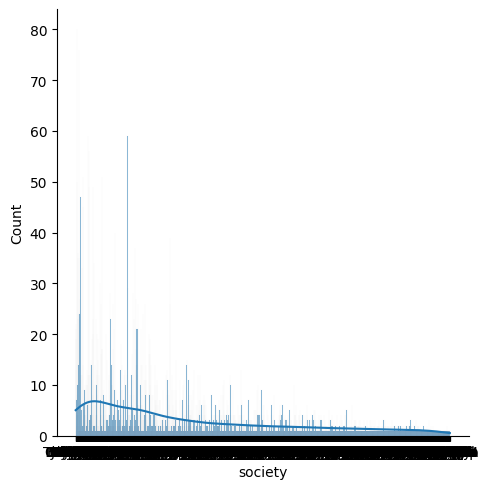

In [116]:
sns.displot(df["society"],kde=True)

Society col also has ouliers..this is an categorical col so i use mode to fill the values

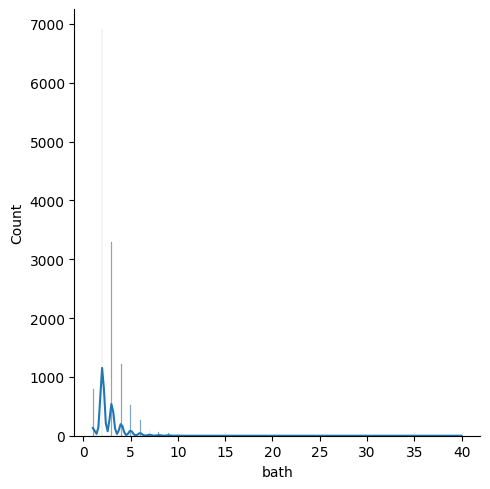

In [117]:
sns.displot(df["bath"],kde=True)

bath price also has outlers i use median insted of mean to fill the values

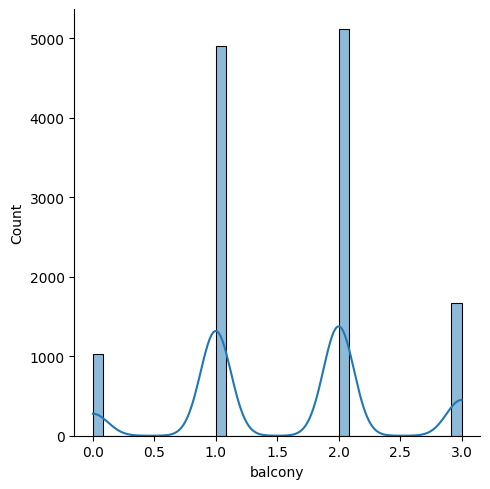

In [118]:
sns.displot(df["balcony"],kde=True)

There are no outlers in the data so i use mean insted of median

In [119]:
df.duplicated().sum()

np.int64(529)

There are some duplicated in the data.so i have to drop that duplicates

In [120]:
df=df.drop_duplicates()

In [121]:
df.duplicated().sum()

np.int64(0)

In [122]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [123]:
for feature in df.columns:
    if df[feature].nunique():
        print(f"{feature} nunique values are:" ,df[feature].nunique())

area_type nunique values are: 4
availability nunique values are: 81
location nunique values are: 1305
size nunique values are: 31
society nunique values are: 2688
total_sqft nunique values are: 2117
bath nunique values are: 19
balcony nunique values are: 4
price nunique values are: 1994


In [124]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In the above descibe Price col should be min price is 8lakh and max price is 36 lakh..

and in bath col min is 0 and max is 40.

In [125]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='object']
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))


num_features=[feature for feature in df.columns if df[feature].dtype!="object"]
print('\nWe have {} num_features  : {}'.format(len(num_features), num_features))


We have 6 categorical features : ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

We have 3 num_features  : ['bath', 'balcony', 'price']


In [126]:
cat_features

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

In [127]:
print("Categories in 'area_type' variable:     ",end=" " )
print(df['area_type'].unique())

print("categories in availability  variable:  ",end="")
print(df["availability"].unique())

print("categories in location  variable:  ",end="")
print(df["location"].unique())

print("categories in size  variable:  ",end="")
print(df["size"].unique())
print("")

print("categories in society  variable:  ",end="")
print(df["society"].unique())


print("categories in total_sqft  variable:  ",end="")
print(df["total_sqft"].unique())



Categories in 'area_type' variable:      ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
categories in availability  variable:  ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
categories in location  variable:  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttar

In [128]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [129]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In size col there are same type but diff names so i have to change it.

In [130]:
df['size'] = df['size'].astype(str).str.replace(' Bedroom', ' BHK')

In [131]:
df["size"].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '1 RK', '8 BHK',
       '7 BHK', '5 BHK', '11 BHK', '9 BHK', 'nan', '27 BHK', '10 BHK',
       '19 BHK', '16 BHK', '43 BHK', '14 BHK', '12 BHK', '13 BHK',
       '18 BHK'], dtype=object)

__Exploratory Data Visualisation__

In [132]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<Axes: xlabel='count', ylabel='area_type'>

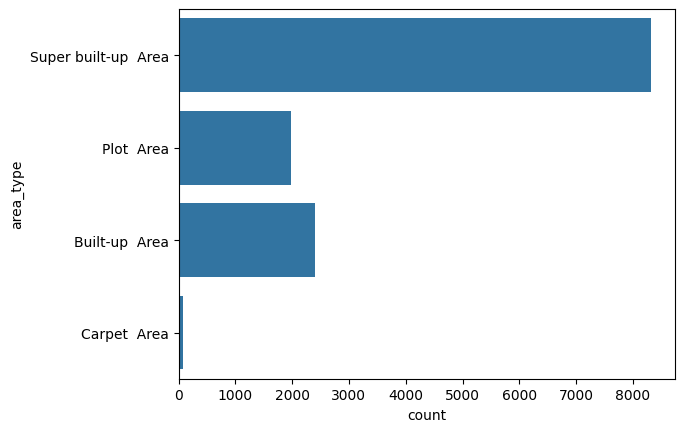

In [133]:
sns.countplot(df["area_type"])

Max frequency is super built in area..and lowest frequency is carpet_area

In [134]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [135]:
df=df.drop(columns="availability")

In [136]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<Axes: xlabel='count', ylabel='size'>

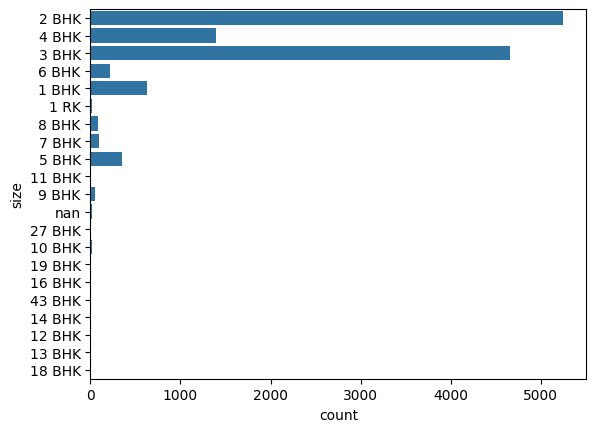

In [137]:
sns.countplot(df["size"])

In [140]:
df["size"].value_counts()

size
2 BHK     5245
3 BHK     4655
4 BHK     1398
1 BHK      625
5 BHK      350
6 BHK      221
7 BHK       99
8 BHK       89
9 BHK       54
nan         16
10 BHK      14
1 RK        13
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: count, dtype: int64

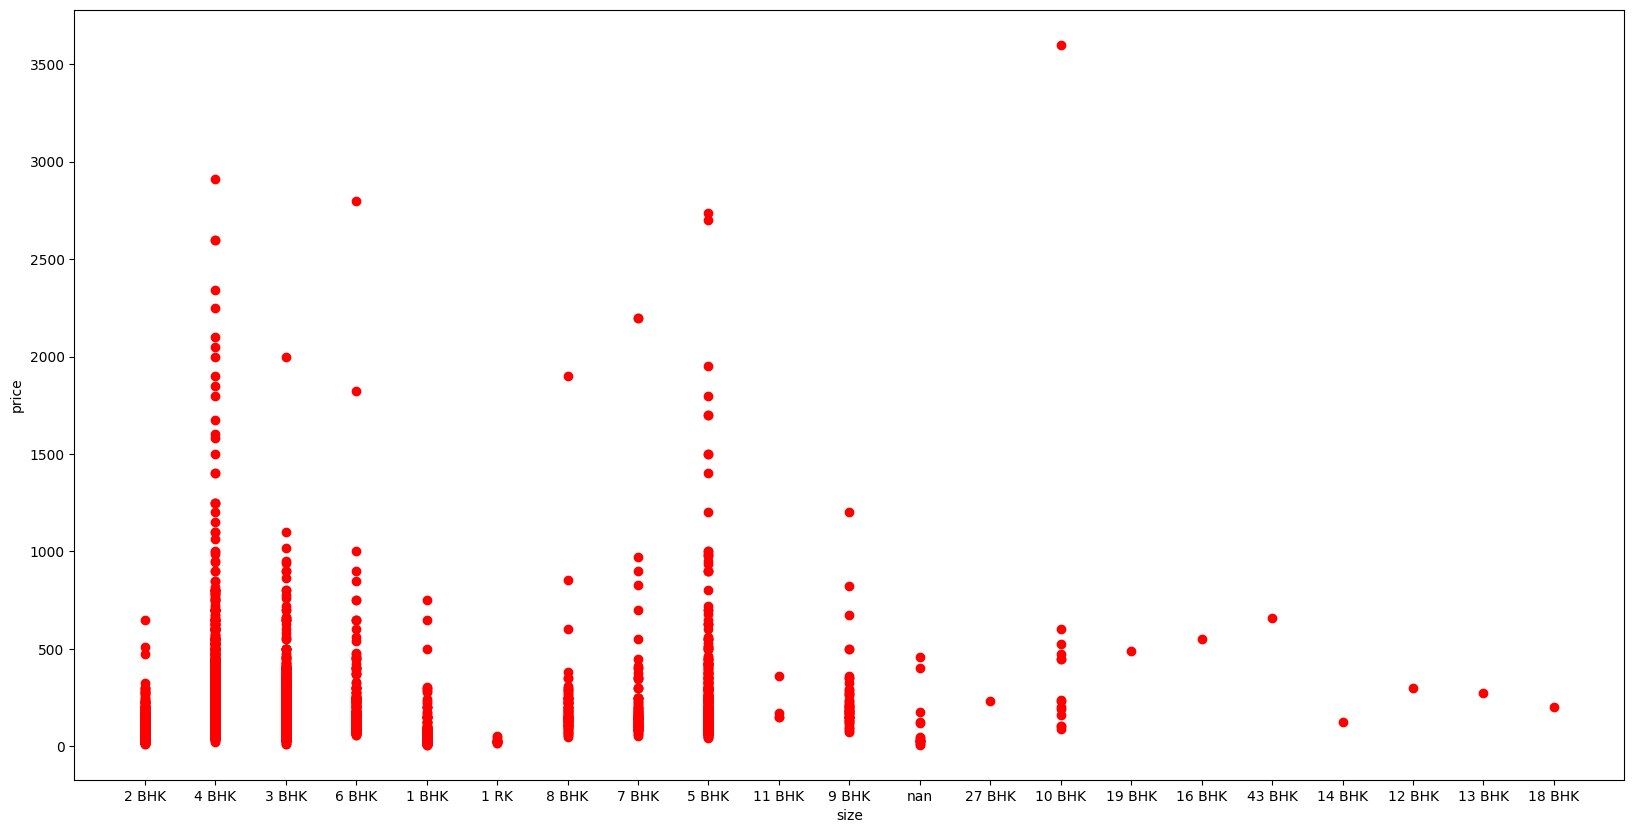

In [151]:
plt.figure(figsize=((20,10)))
plt.scatter(df['size'],df["price"],c="red")
plt.xlabel("size")
plt.ylabel('price')

plt.show()

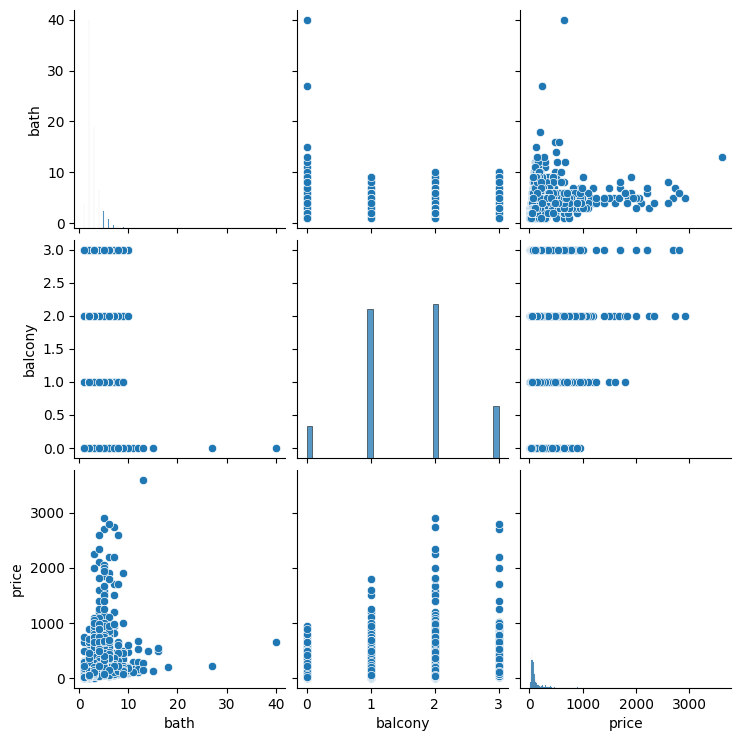

In [153]:
sns.pairplot(df)

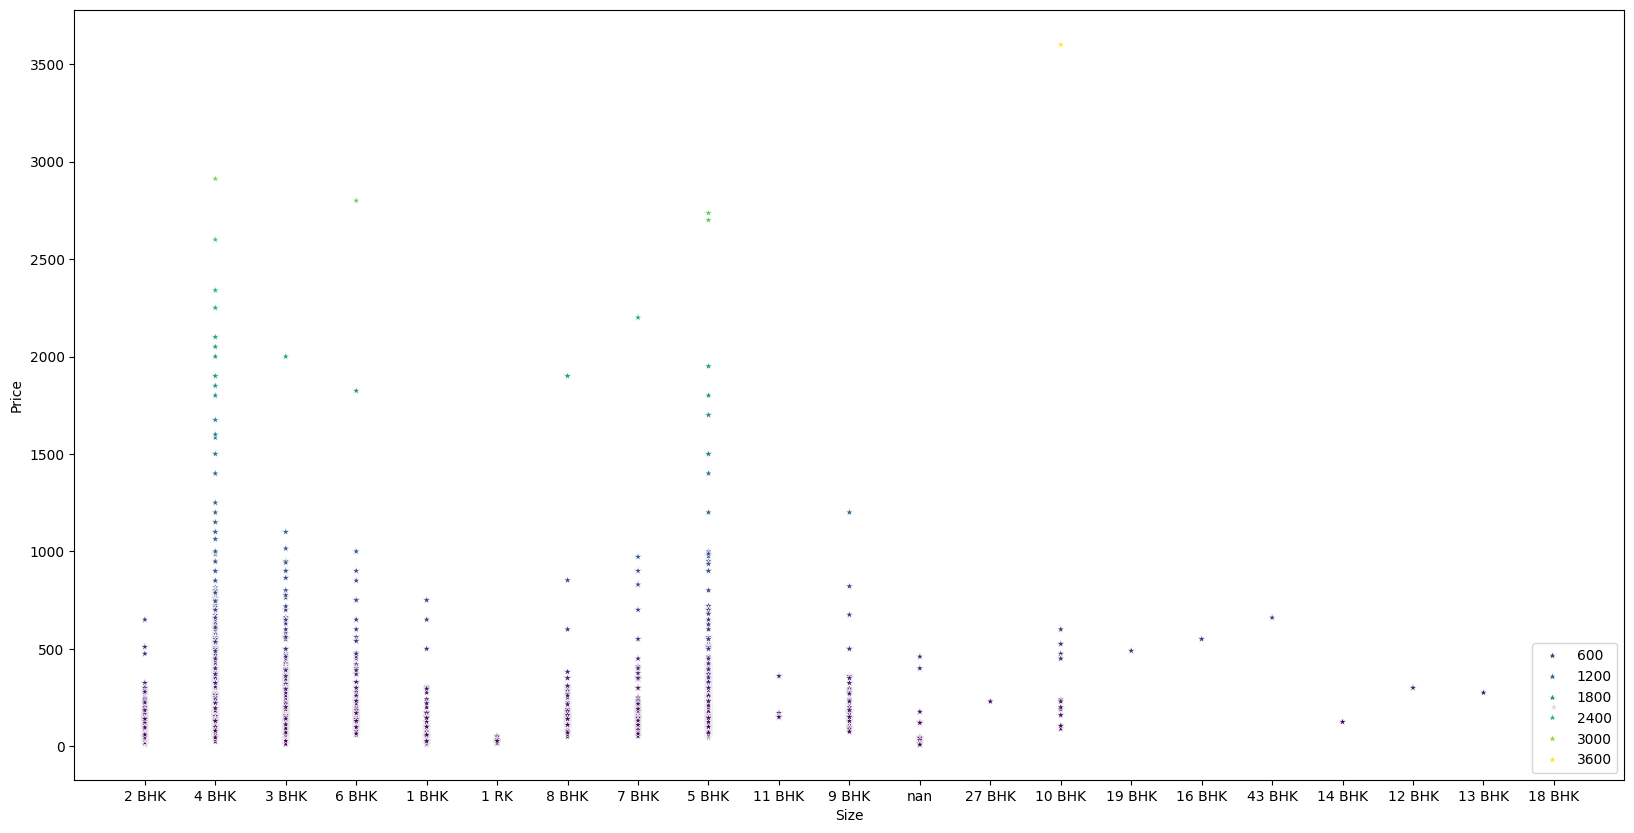

In [162]:

plt.figure(figsize=(20, 10))
plt.xlabel("Size")
plt.ylabel("Price")

# Remove 'c="blue"' since hue already assigns colors
sns.scatterplot(x="size", y="price", hue="price", data=df, palette="viridis",marker="*")

plt.legend(loc="lower right")
plt.show()

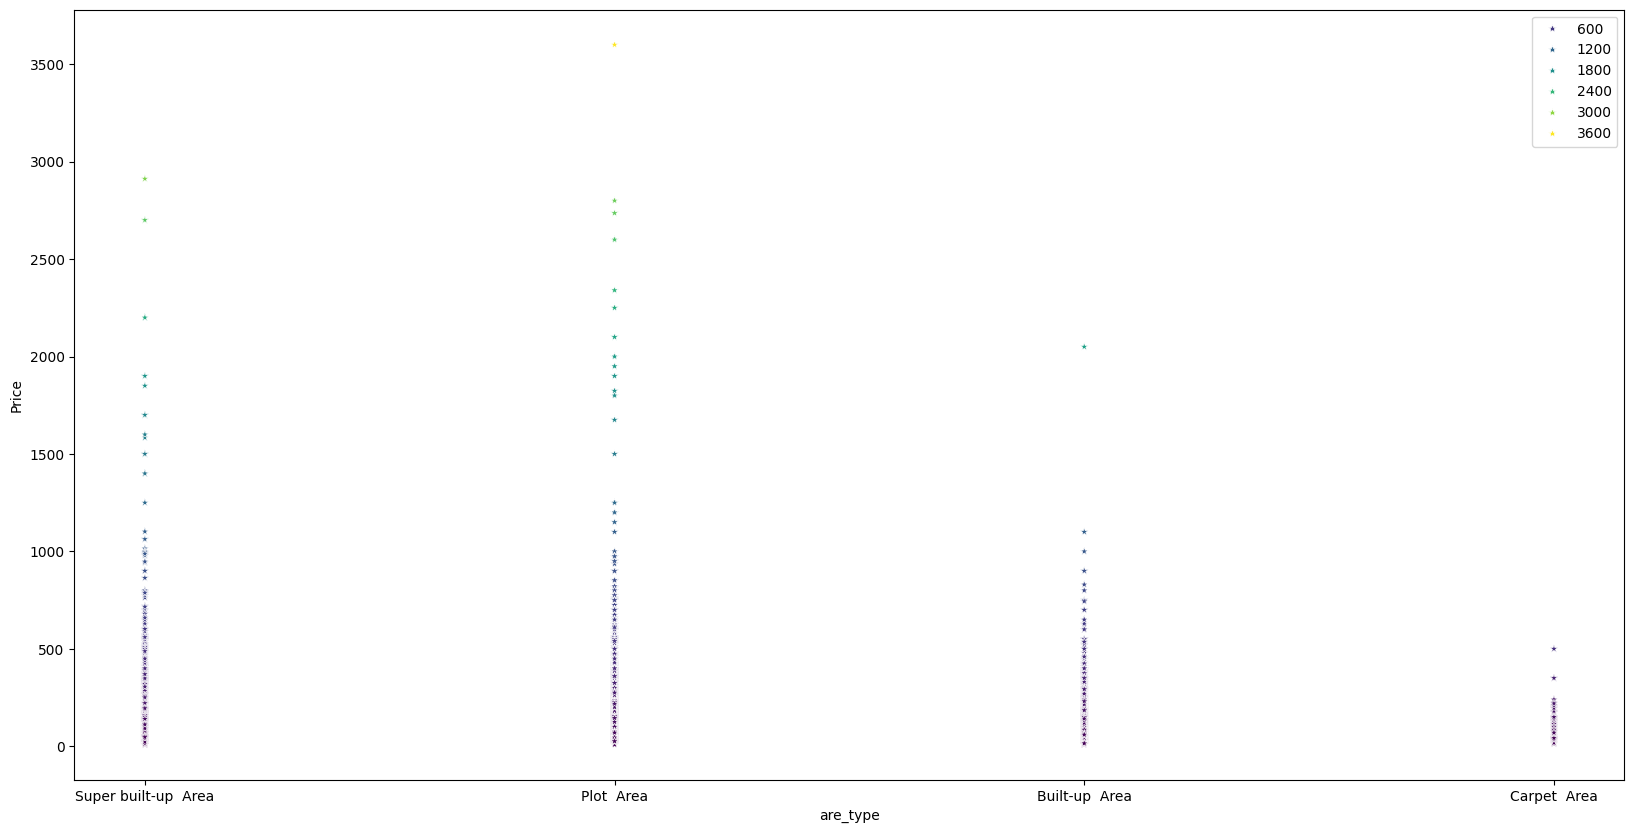

In [164]:

plt.figure(figsize=(20, 10))
plt.xlabel("are_type")
plt.ylabel("Price")

# Remove 'c="blue"' since hue already assigns colors
sns.scatterplot(x="area_type", y="price", hue="price", data=df, palette="viridis",marker="*")

plt.legend(loc="upper right")
plt.show()

In [165]:
df.to_csv("cleaned.csv")